### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head(5)

# 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
print(df.info())

# 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.
print(df.dtypes)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB
None
OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

Text(0, 0.5, '총 매출액')

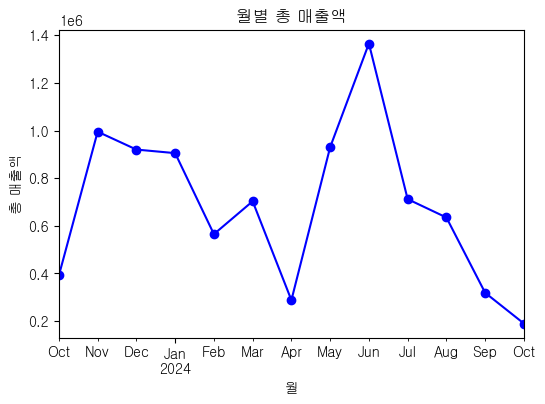

In [3]:
# **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요. (매출액 = `Quantity` * `Price`)
df['TotalRevenue'] = df['Quantity'] * df['Price']

# 월별 총 매출액을 집계하여 시각화하세요. (`resample()`을 사용하여 월별로 데이터를 집계하세요.)
df.set_index('OrderDate', inplace=True)
month_total = df['TotalRevenue'].resample('ME').sum()

plt.figure(figsize=(6,4))
month_total.plot(
    kind='line',
    marker='o',
    color='blue'
)

plt.title('월별 총 매출액')
plt.xlabel('월')
plt.ylabel('총 매출액')


In [4]:
# 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [5]:
# 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.
df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [6]:
# 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [7]:
# 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False).head(5)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
Name: OrderID, dtype: int64

In [8]:
# **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요. 
# (고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.)
from datetime import datetime

df['Birthdate'] = pd.to_datetime(df['Birthdate'])
now_date = datetime.now()
df['Age'] = now_date.year - df['Birthdate'].dt.year

df['Age'].max(),  df['Age'].min()

bins = [0, 29, 39, 49, 59, 69]
labels = ['20대', '30대', '40대', '50대', '60대']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

grouped_category = df.groupby(['age_group', 'Category']).size().reset_index(name='count')
grouped_category.loc[grouped_category.groupby('age_group')['count'].idxmax()]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6472\2900347466.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_category = df.groupby(['age_group', 'Category']).size().reset_index(name='count')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6472\2900347466.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_category.loc[grouped_category.groupby('age_group')['count'].idxmax()]


,age_group,Category,count
0,20대,Beauty,6
10,30대,Food,11
13,40대,Books,8
21,50대,Electronics,7
27,60대,Electronics,3


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [9]:
# 가장 많이 판매된 상위 5개의 상품을 출력하세요.
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

In [10]:
# **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
df.groupby('Category')['Quantity'].sum().idxmax()

'Books'

In [11]:
# **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.
df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

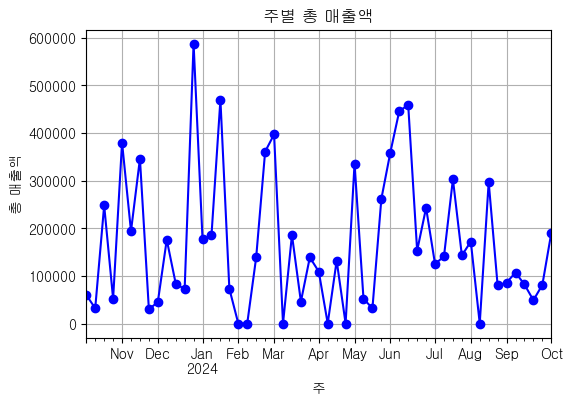

In [12]:
# 주별 총 매출액을 집계하여 시각화하세요. (`resample()`을 사용하여 월별로 데이터를 집계하세요.)
week_total = df['TotalRevenue'].resample('W').sum()

plt.figure(figsize=(6,4))
week_total.plot(
    kind='line',
    marker='o',
    color='blue'
)

plt.title('주별 총 매출액')
plt.xlabel('주')
plt.ylabel('총 매출액')
plt.grid(True)


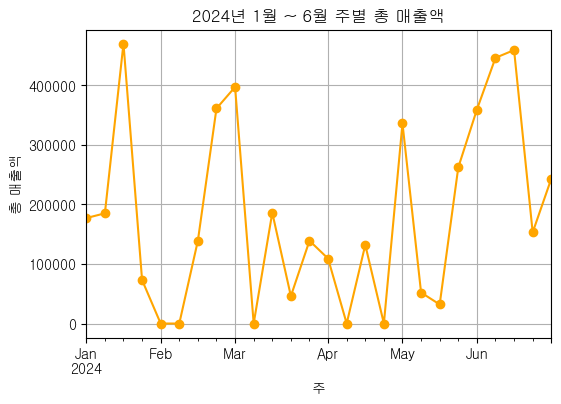

In [13]:
# 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
df.index = pd.to_datetime(df.index)
df = df.sort_index()

start_date = '2024-01-01'
end_date = '2024-06-30'
df_filtered = df.loc[start_date:end_date]

week_filtered_total = df_filtered['TotalRevenue'].resample('W').sum()

plt.figure(figsize=(6,4))
week_filtered_total.plot(
    kind='line',
    marker='o',
    color='orange'
)

plt.title('2024년 1월 ~ 6월 주별 총 매출액')  
plt.xlabel('주')  
plt.ylabel('총 매출액')  
plt.grid(True)
plt.show()

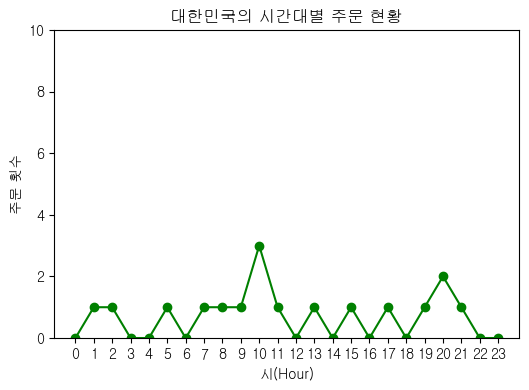

In [18]:
# 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.
df['Country'].value_counts()

# print(len(df[df['Country'] == '대한민국']))

df['Hour'] = df.index.hour

df_grouped = df[df['Country'] == '대한민국'].groupby('Hour')['OrderID'].count()

df_hour_data = df_grouped.reindex(range(24), fill_value=0)

plt.figure(figsize=(6,4))
df_hour_data.plot(
    kind='line',
    marker='o',
    color='green'
)

plt.xticks(range(24))
plt.title("대한민국의 시간대별 주문 현황")
plt.xlabel("시(Hour)")
plt.ylabel("주문 횟수")
plt.ylim(0, 10)
# plt.grid(True)
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [15]:
# 고객의 **재구매율**을 분석하세요.
# 재구매율 = 한 고객이 여러 번 주문한 비율
customer_data = df.groupby('CustomerID')['OrderID'].count()
print(((customer_data > 1).sum() / customer_data.sum()) * 100)


7.5


In [16]:
# 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.
print(df.groupby('Category')['DiscountRate'].mean().sort_values(ascending=False))

Category
Beauty         0.186522
Sports         0.179444
Electronics    0.175789
Food           0.174091
Books          0.170000
Clothing       0.154000
Name: DiscountRate, dtype: float64
